<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Useful-Scripts" data-toc-modified-id="Useful-Scripts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Useful Scripts</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#descriptive-statistics" data-toc-modified-id="descriptive-statistics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>descriptive statistics</a></span><ul class="toc-item"><li><span><a href="#Mean" data-toc-modified-id="Mean-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Mean</a></span></li><li><span><a href="#standard-deviation" data-toc-modified-id="standard-deviation-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>standard deviation</a></span></li><li><span><a href="#skewness" data-toc-modified-id="skewness-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>skewness</a></span></li><li><span><a href="#kurtosis" data-toc-modified-id="kurtosis-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>kurtosis</a></span></li></ul></li><li><span><a href="#Robust-statistics:-median" data-toc-modified-id="Robust-statistics:-median-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Robust statistics: median</a></span></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Outliers</a></span></li><li><span><a href="#Mutual-Information-between-Target-and-the-Predictors" data-toc-modified-id="Mutual-Information-between-Target-and-the-Predictors-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Mutual Information between Target and the Predictors</a></span></li></ul></div>

# Data Description

The datasets contains transactions made by credit cards in September
2013 by european cardholders.


This dataset presents transactions that occurred in two days,
where we have 492 frauds out of 284,807 transactions. 

The dataset is highly unbalanced, the positive class (frauds)
account for 0.172% of all transactions.

It contains only numerical input variables which are
the result of a PCA transformation.


Unfortunately, due to confidentiality issues,
we cannot provide the original features and 
more background information about the data.


Features V1, V2, ... V28 are the principal
components obtained with PCA,
the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

Feature 'Time' contains the seconds elapsed between each transaction
and the first transaction in the dataset. The feature 'Amount'
is the transaction Amount, this feature can be used for 
example-dependant cost-senstive learning. 

Feature 'Class' is the response variable and it takes value
1 in case of fraud and 0 otherwise.

# Imports

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import os
import time

# random state
random_state=100
np.random.seed=random_state
np.random.set_state=random_state

# Jupyter notebook settings for pandas
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 50)

print([(x.__name__,x.__version__) for x in [np, pd,sns,matplotlib]])

[('numpy', '1.16.4'), ('pandas', '0.25.0'), ('seaborn', '0.9.0'), ('matplotlib', '3.1.1')]


In [5]:
import scipy
from scipy import stats

In [6]:
import IPython
from IPython.display import display

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Useful Scripts

In [8]:
def show_method_attributes(method, ncols=7):
    """ Show all the attributes of a given method.
    Example:
    ========
    show_method_attributes(list)
     """
    x = [i for i in dir(method) if i[0].islower()]
    x = [i for i in x if i not in 'os np pd sys time psycopg2'.split()]

    return pd.DataFrame(np.array_split(x,ncols)).T.fillna('')

In [9]:
def json_dump_tofile(myjson,ofile,sort_keys=False):
    """Write json dictionary to a datafile.
    
    Usage:
    myjson = {'num': 5, my_list = [1,2,'apple']}
    json_dump_tofile(myjson, ofile)
    
    """
    import io
    import json

    with io.open(ofile, 'w', encoding='utf8') as fo:
        json_str = json.dumps(myjson,
                          indent=4,
                          sort_keys=sort_keys,
                          separators=(',', ': '),
                          ensure_ascii=False)
        fo.write(str(json_str))

# Load the data

In [10]:
df = pd.read_csv('../data/raw/creditcard.csv.zip',compression='zip')
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
df.filter(regex='V').columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

# descriptive statistics

In [12]:
pca_vars = ['V%i' % k for k in range(1,29)]
df[pca_vars].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,1.673327e-15,-1.254995e-15,8.176030e-16,1.206296e-15,4.913003e-15,1.437666e-15,-3.800113e-16,9.572133e-16,1.039817e-15,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01


## Mean

In [18]:
def plot_statistics(df,features,statistic,color='b'):
    plt.figure(figsize=(12,4), dpi=80)
    sns.barplot(x=features, y= df[pca_vars].agg(statistic),color=color)
    plt.xlabel('Features')
    plt.ylabel(statistic.title())
    plt.title(statistic.title()+ ' for all features')
    plt.savefig(f'../reports/statistics/{statistic}.png',dpi=300)
    plt.show()
    plt.close()

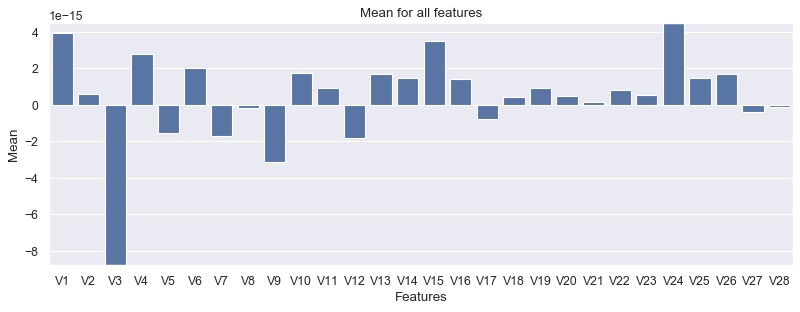

In [19]:
plot_statistics(df,pca_vars,'mean',color='b')
# all means are zero

## standard deviation

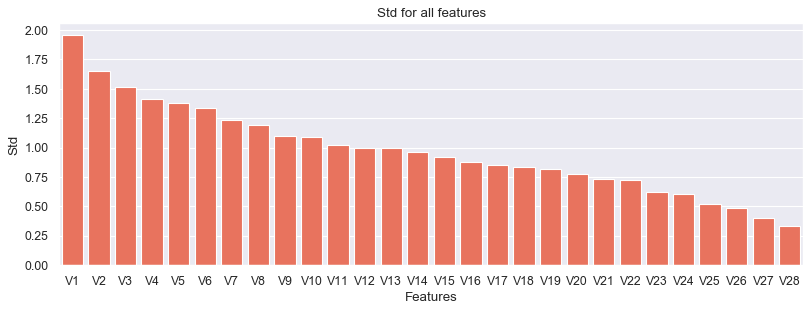

In [20]:
plot_statistics(df,pca_vars,'std',color='tomato')

# all std are less than 2.0

## skewness

![](../images/skewness.png)

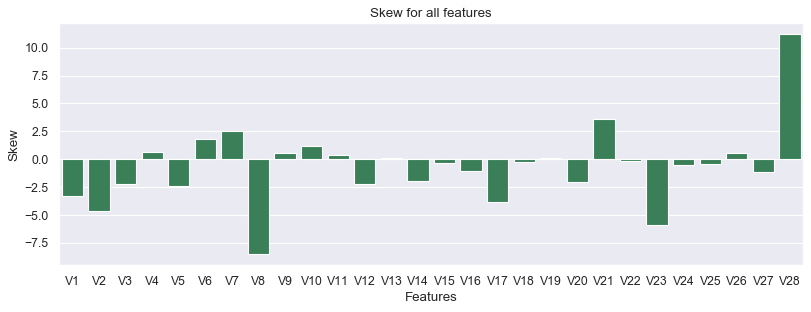

In [21]:
plot_statistics(df,pca_vars,'skew',color='seagreen')

# some features are skewed eg. V8, V23, V28

In [27]:
df['V28'].skew()

11.192091192212809

Text(0.5, 1.0, ' distribution plot of feature: V28')

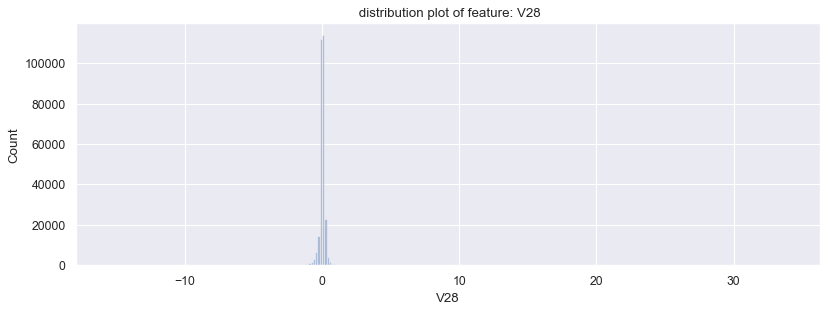

In [22]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(df['V28'], bins=300, kde=False)
plt.ylabel('Count')
plt.title(' distribution plot of feature: V28')

# almost all of data is centered around 0.

(-2, 2)

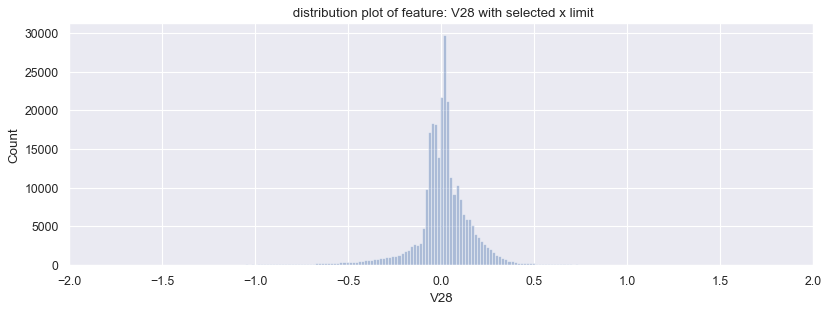

In [25]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(df['V28'], bins=3000, kde=False)
plt.ylabel('Count')
plt.title(' distribution plot of feature: V28 with selected x limit')
plt.xlim(-2,2)

# almost all of data is centered around 0.

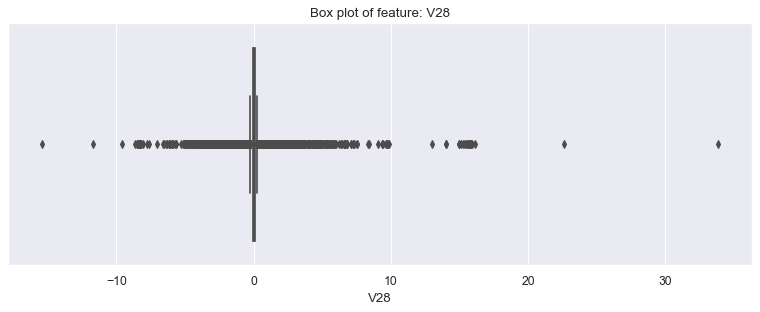

In [30]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(df['V28'])
plt.title('Box plot of feature: V28')
plt.savefig('../reports/statistics/v28_boxplot.png',dpi=300)

# there are so many outliers
# boxplot is hard to read, we can plot kurtosis plot.

## kurtosis

![](../images/moments.png)
![](../images/kurtosis.png)

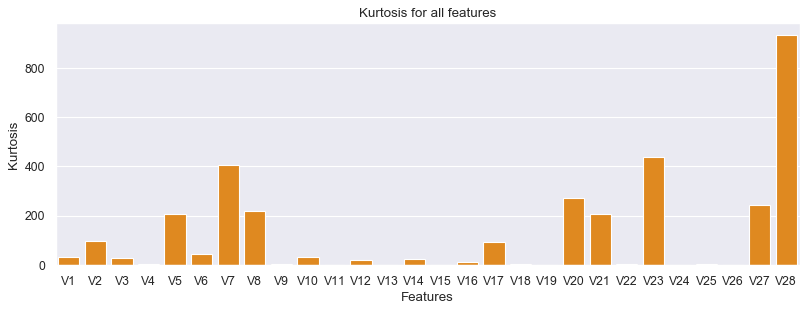

In [28]:
plot_statistics(df,pca_vars,'kurtosis',color='darkorange')

In [29]:
df['V28'].kurtosis()

933.3975020960183

# Robust statistics: median

In [15]:
# pca variables are heavily tailed, we can use more robust descriptive
# statistic such as median.

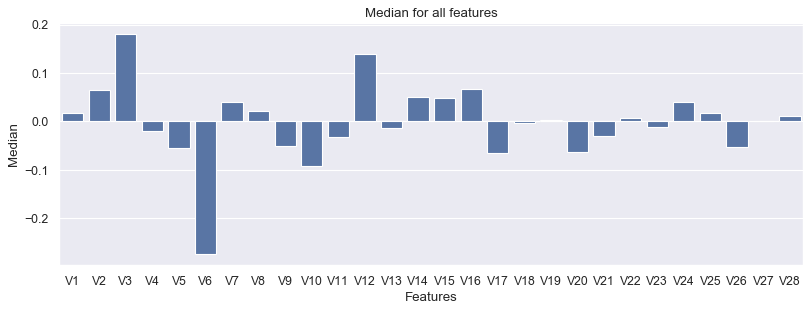

In [38]:
plot_statistics(df,pca_vars,'median',color='b')

# medians are roughly 0

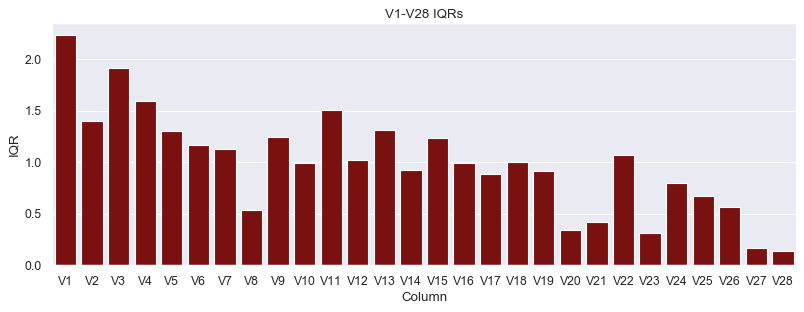

In [31]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=df[pca_vars].quantile(0.75)
            - df[pca_vars].quantile(0.25), color='darkred')
plt.xlabel('Column')
plt.ylabel('IQR')
plt.title('V1-V28 IQRs')
plt.savefig('../reports/statistics/iqr.png',dpi=300)

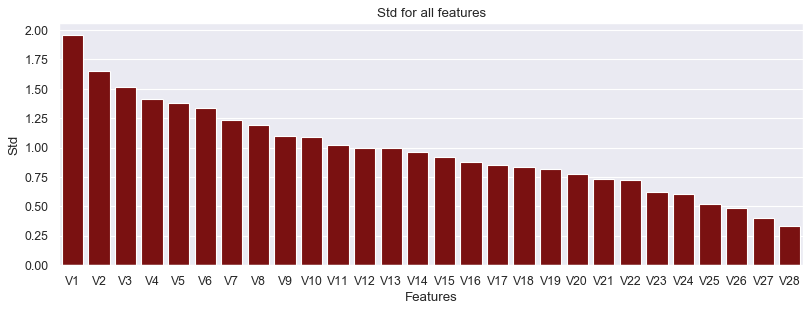

In [32]:
plot_statistics(df,pca_vars,'std',color='darkred')
# IQR and standard deviations look very similar.
# this means not too many points are outliers.

# Outliers

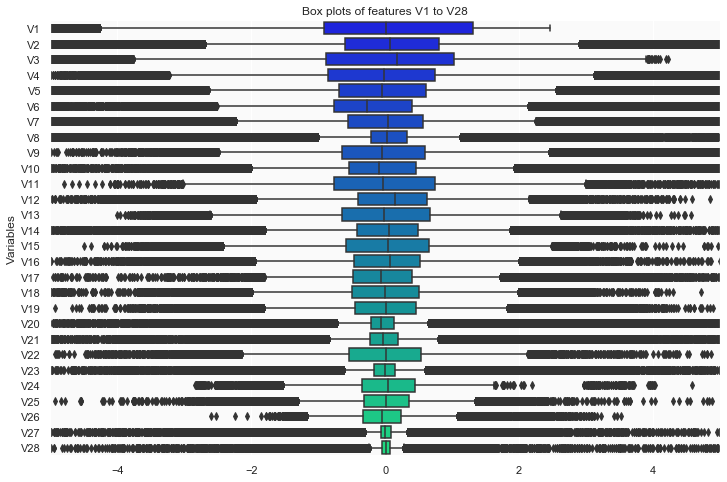

In [33]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(data = df.drop(columns=['Amount', 'Class', 'Time']), 
  orient = 'h', palette = 'winter')

ax.set(xlim=(-5,5))
ax.set_facecolor('#fafafa')
ax.set_title('Box plots of features V1 to V28')
ax.set_ylabel('Variables')
plt.savefig('../reports/statistics/boxplot_all_features.png',dpi=300)

# Mutual Information between Target and the Predictors

In [42]:
from sklearn.feature_selection import mutual_info_classif

In [45]:
%%time
mutual_infos = pd.Series(data=mutual_info_classif(df[pca_vars], df['Class'],
                                                  discrete_features=False,
                                                  random_state=random_state),
                         index=pca_vars)

CPU times: user 1min 20s, sys: 1.33 s, total: 1min 21s
Wall time: 1min 23s


In [48]:
mutual_infos.sort_values(ascending=False).to_frame().T

# most related quantites are v17, v14, v12 and so on.

,V17,V14,V12,V10,V11,V16,V4,V3,V18,V9,V7,V2,V21,V27,V5,V6,V1,V8,V28,V19,V20,V23,V24,V26,V25,V13,V22,V15
0,0.008258,0.008136,0.007601,0.00753,0.006831,0.006144,0.004976,0.004952,0.004317,0.004277,0.003952,0.003228,0.002452,0.002444,0.002391,0.002388,0.002127,0.001898,0.001871,0.001472,0.001207,0.000762,0.000642,0.0005,0.000498,0.000408,0.000353,0.000315
